# Part (a)

In [2]:
# Load data
import numpy as np
import pandas as pd

data = pd.read_csv("../data/C_MissingFeatures.csv", index_col=0)

In [3]:
# Report on mising values
print(f"There are {np.count_nonzero(data.isna())} datapoints missing.")
print(
    f"The following samples are affected: {list(data.index[np.any(data.isna(), axis=1)])}"
)

for idx in list(data.index[np.any(data.isna(), axis=1)]):
    print(
        f"Row with index {idx} has {np.count_nonzero(data.loc[idx].isna())} datapoints missing."
    )

print(
    f"The following features have missing data: {list(data.columns[np.any(data.isna(), axis=0)])}"
)

for idx in list(data.columns[np.any(data.isna(), axis=0)]):
    print(
        f"Column with name {idx} has {np.count_nonzero(data[idx].isna())} datapoints missing."
    )

There are 55 datapoints missing.
The following samples are affected: ['Sample138', 'Sample143', 'Sample231', 'Sample263', 'Sample389']
Row with index Sample138 has 11 datapoints missing.
Row with index Sample143 has 11 datapoints missing.
Row with index Sample231 has 11 datapoints missing.
Row with index Sample263 has 11 datapoints missing.
Row with index Sample389 has 11 datapoints missing.
The following features have missing data: ['Fea58', 'Fea142', 'Fea150', 'Fea233', 'Fea269', 'Fea299', 'Fea339', 'Fea355', 'Fea458', 'Fea466', 'Fea491']
Column with name Fea58 has 5 datapoints missing.
Column with name Fea142 has 5 datapoints missing.
Column with name Fea150 has 5 datapoints missing.
Column with name Fea233 has 5 datapoints missing.
Column with name Fea269 has 5 datapoints missing.
Column with name Fea299 has 5 datapoints missing.
Column with name Fea339 has 5 datapoints missing.
Column with name Fea355 has 5 datapoints missing.
Column with name Fea458 has 5 datapoints missing.
Colu

# Part (c)

In [4]:
import sys

sys.path.append("..")
from src.preprocessing import DataImputer

imputer = DataImputer()
data_imputed = data.copy()
data_imputed.iloc[:, :-1] = imputer.fit_transform(data_imputed.iloc[:, :-1])

We can now compare the imputed distributions with the originals using seaborn's `kdeplot`.
We notice no significant differences

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
fig, ax = plt.subplots(
    len(data.columns[np.any(data.isna(), axis=0)]), 2, figsize=(10, 50), dpi=300
)
for i, col in enumerate(data.columns[np.any(data.isna(), axis=0)]):
    sns.kdeplot(x=data.loc[:, col], ax=ax[i][0], fill=True)
    sns.kdeplot(x=data_imputed.loc[:, col], ax=ax[i][1], fill=True)

plt.suptitle(
    "Density plots for the features with missing data - before and after", fontsize=30
)

Text(0.5, 0.98, 'Density plots for the features with missing data - before and after')

We can further verify this by observing the properties of 2 features, which remain similar.

In [6]:
data["Fea339"].describe()

count    403.000000
mean       1.918486
std        1.114654
min        0.000000
25%        1.098612
50%        2.079442
75%        2.772589
max        4.770685
Name: Fea339, dtype: float64

In [7]:
data_imputed["Fea339"].describe()

count    408.000000
mean       1.919595
std        1.108495
min        0.000000
25%        1.098612
50%        2.079442
75%        2.772589
max        4.770685
Name: Fea339, dtype: float64

# Part (d)
We can detect outliers by transforming the features using $Z = \frac{X - \mu}{\sigma}$.

We consider outliers all values for which $\lvert Z\rvert > 3$.

In [8]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
data_imputed.loc[:, :] = scaler.fit_transform(data_imputed)

print(f"There are {np.count_nonzero(abs(data_imputed) > 3)} outliers detected.")
print(
    f"The following samples are affected: {list(data_imputed.index[np.any(abs(data_imputed) > 3, axis=1)])}"
)

for idx in list(data_imputed.index[np.any(abs(data_imputed) > 3, axis=1)]):
    print(
        f"Row with index {idx} has {np.count_nonzero(data_imputed.loc[idx] > 3)} datapoints missing."
    )

print(
    f"The following features have missing data: {list(data_imputed.columns[np.any(abs(data_imputed) > 3, axis=0)])}"
)

for idx in list(data_imputed.columns[np.any(abs(data_imputed) > 3, axis=0)]):
    print(
        f"Feature {idx} has {np.count_nonzero(data_imputed.loc[:, idx] > 3)} datapoints missing."
    )
data_imputed.loc[:, :] = scaler.inverse_transform(data_imputed)

There are 2904 outliers detected.
The following samples are affected: ['Sample1', 'Sample2', 'Sample3', 'Sample4', 'Sample5', 'Sample6', 'Sample7', 'Sample8', 'Sample9', 'Sample10', 'Sample11', 'Sample12', 'Sample13', 'Sample14', 'Sample15', 'Sample16', 'Sample17', 'Sample18', 'Sample19', 'Sample20', 'Sample21', 'Sample22', 'Sample23', 'Sample24', 'Sample25', 'Sample26', 'Sample27', 'Sample28', 'Sample29', 'Sample30', 'Sample31', 'Sample32', 'Sample33', 'Sample34', 'Sample35', 'Sample36', 'Sample37', 'Sample38', 'Sample39', 'Sample40', 'Sample41', 'Sample42', 'Sample43', 'Sample44', 'Sample45', 'Sample46', 'Sample47', 'Sample48', 'Sample49', 'Sample50', 'Sample51', 'Sample52', 'Sample53', 'Sample54', 'Sample55', 'Sample56', 'Sample57', 'Sample58', 'Sample59', 'Sample60', 'Sample61', 'Sample62', 'Sample63', 'Sample64', 'Sample65', 'Sample66', 'Sample67', 'Sample68', 'Sample69', 'Sample70', 'Sample71', 'Sample72', 'Sample73', 'Sample74', 'Sample75', 'Sample76', 'Sample77', 'Sample78', 'S

# Part (e)

In [9]:
import sys

sys.path.append("..")
from src.preprocessing import LOFRemove

# Remove outliers using Local Outlier Factor
remover = LOFRemove()
data_no_outliers = remover.fit_transform(data_imputed)
data_no_outliers.loc[:, :] = scaler.inverse_transform(data_no_outliers)

In [10]:
print(f"{len(data) - len(data_no_outliers)} outliers have been removed")

59 outliers have been removed


We then again compare the distributions using the `kdeplot`, and we can see essentially no differences. Features were selected to have different shapes so we can isolate potential effects.

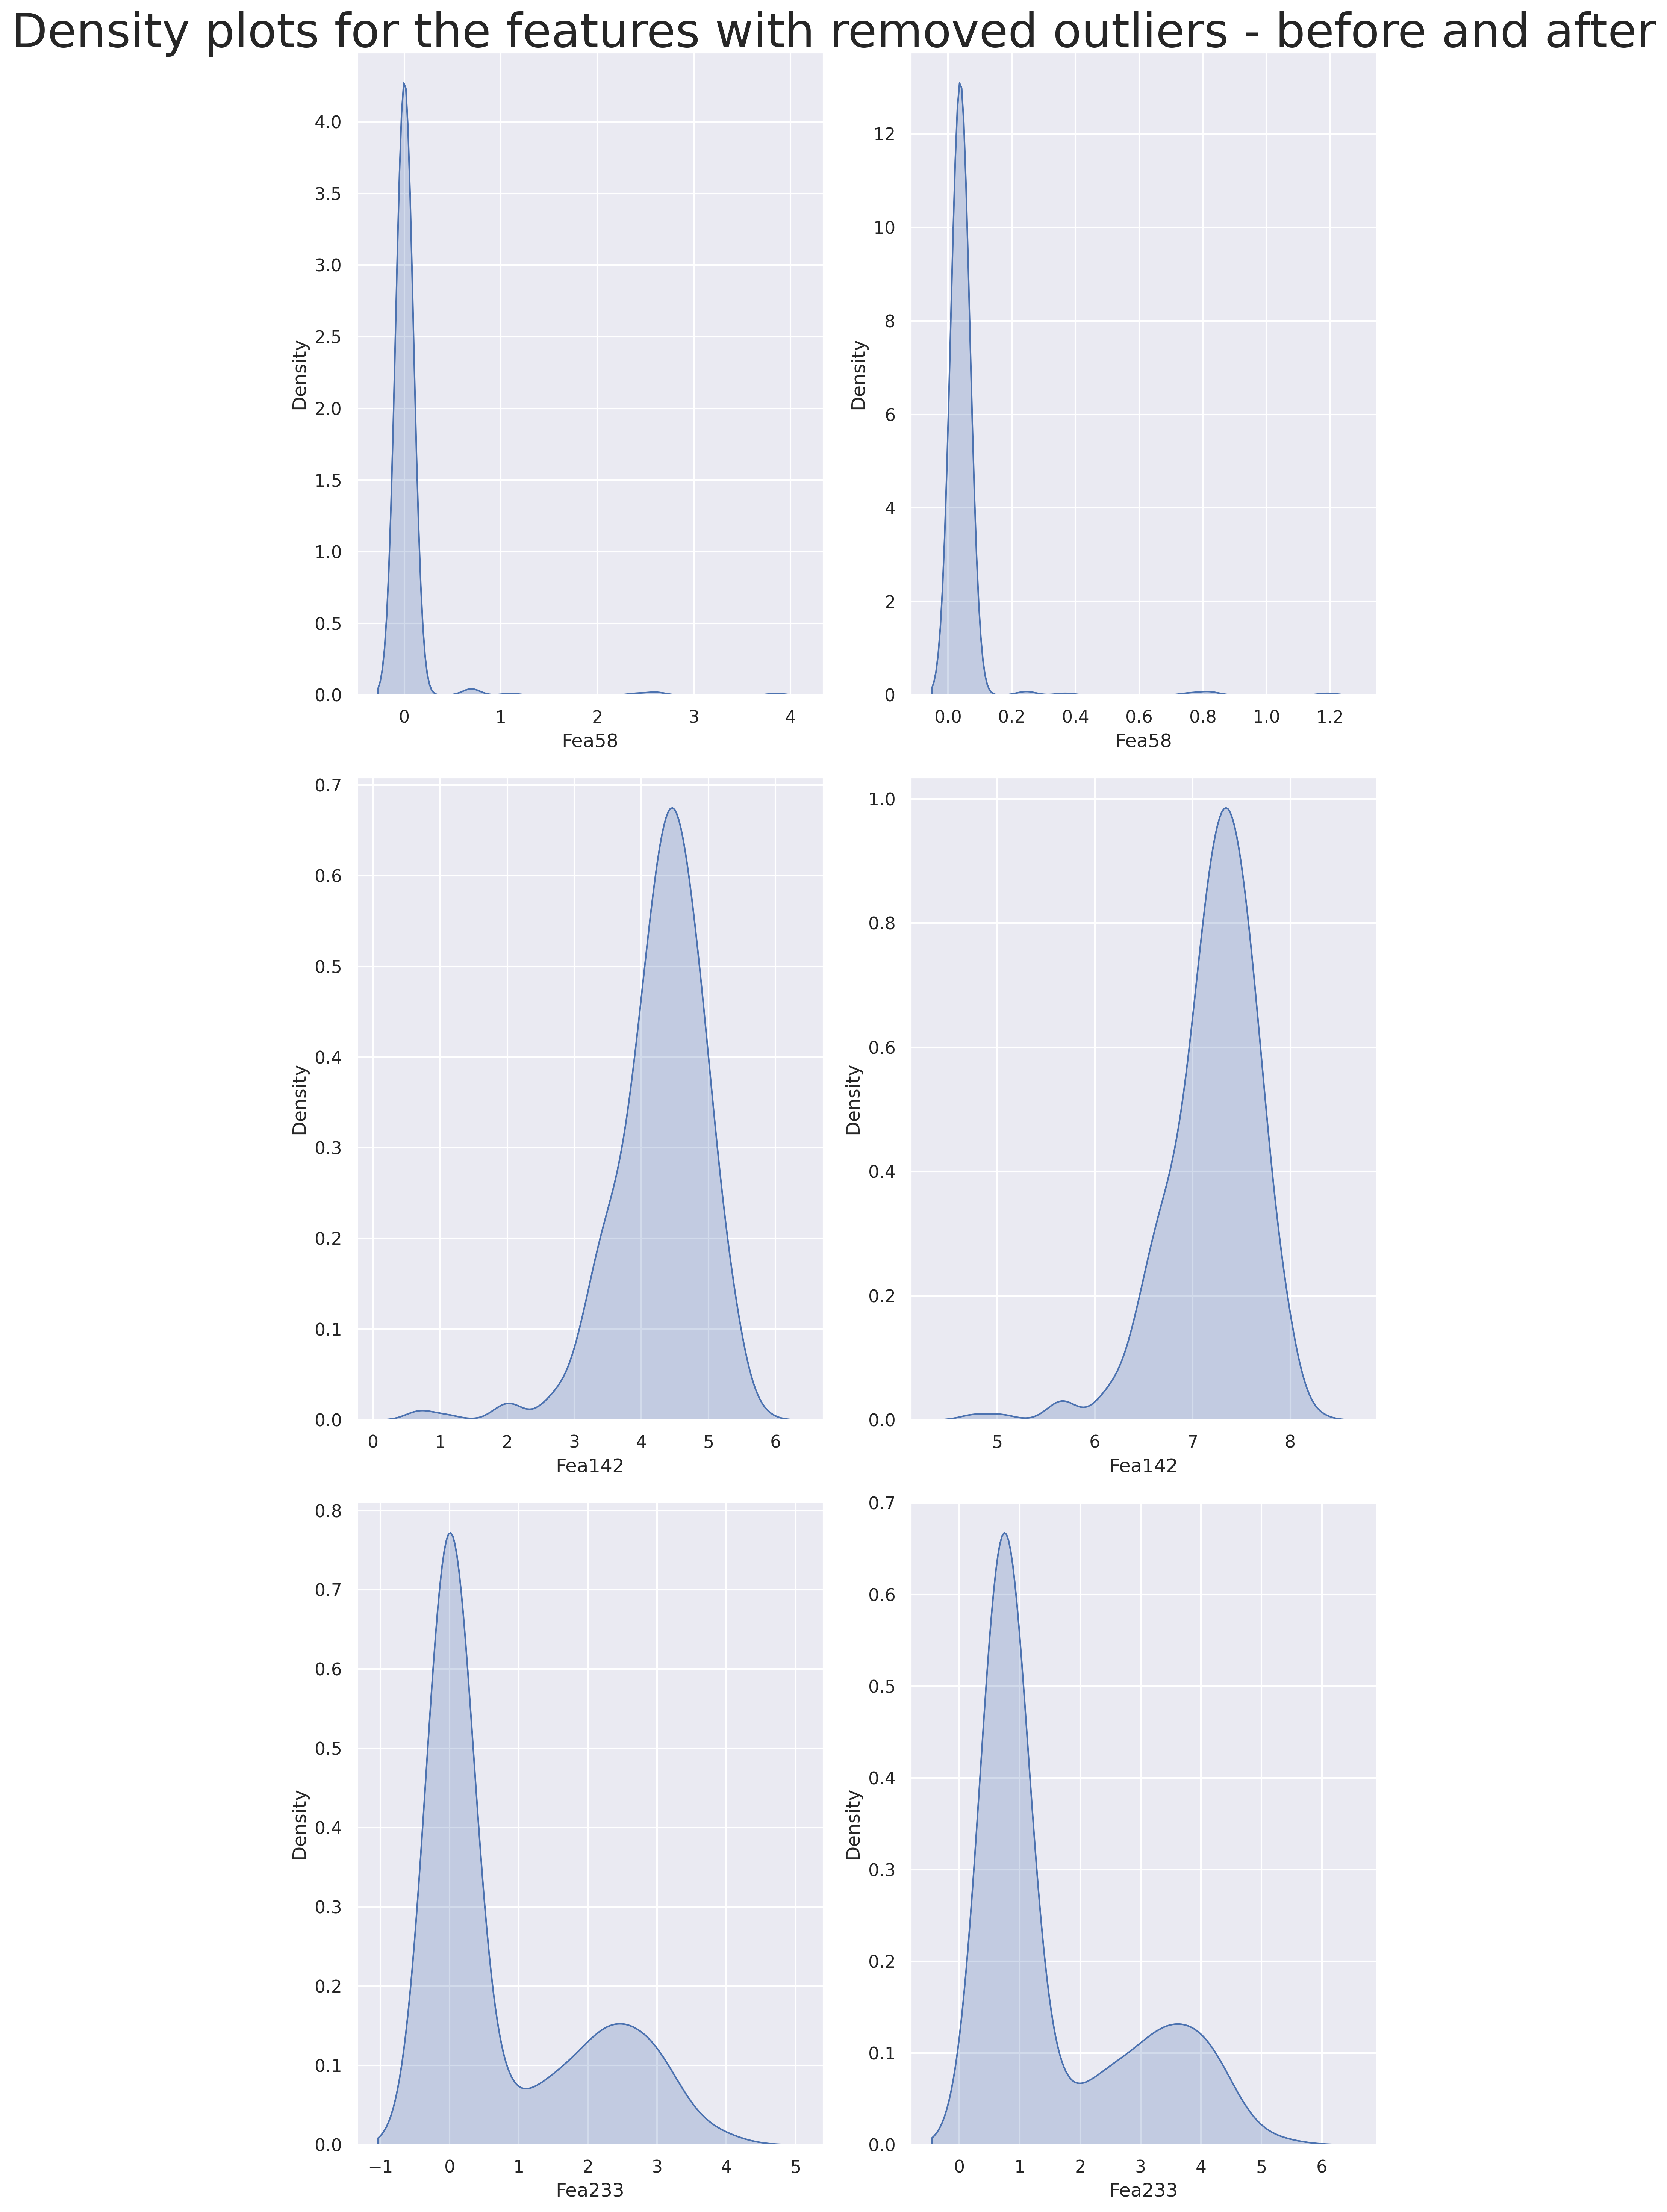

In [11]:
fig, ax = plt.subplots(3, 2, figsize=(10, 20), dpi=300)
for i, col in enumerate(["Fea58", "Fea142", "Fea233"]):
    sns.kdeplot(x=data.loc[:, col], ax=ax[i][0], fill=True)
    sns.kdeplot(x=data_no_outliers.loc[:, col], ax=ax[i][1], fill=True)

plt.suptitle(
    "Density plots for the features with removed outliers - before and after",
    fontsize=30,
)
plt.tight_layout()